# **TO ASK QUESTIONS:**  
- Reach Me Out On: https://www.linkedin.com/in/hassan-mehmood-01a3a9247/  

# **FOR 1:1 Meeting with me:**  
- TOP: https://topmate.io/hassan_mehmood1  

# GEMINI

In [ ]:
# Install the Gemini (Google Generative AI) SDK first:
!pip install -U google-generativeai

# -------------------------------
# Python code
# -------------------------------
import os
import google.generativeai as genai

# Set your API key
os.environ["GEMINI_API_KEY"] = ""
genai.configure(api_key=os.environ["GEMINI_API_KEY"])

# Initialize the model
model = genai.GenerativeModel("gemini-2.5-flash")

# Generate content
response = model.generate_content("Explain how AI works in a few words")

# Print output
print(response.text)


# GROK

In [ ]:
# Install groq if not already
!pip install groq

# -------------------------------
# Python code
# -------------------------------
import os
from groq import Groq

# Set your API key
os.environ["GROQ_API_KEY"] = ""

# Initialize client
client = Groq(api_key=os.environ["GROQ_API_KEY"])

# Create streaming completion
completion = client.chat.completions.create(
    model="llama-3.3-70b-versatile",
    messages=[
        {"role": "user", "content": "Hello, explain AI in simple words"}
    ],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=True
)

# Stream the output
for chunk in completion:
    if chunk.choices[0].delta.content:
        print(chunk.choices[0].delta.content, end="")


# IMAGE CREATION ON SCENERIO BASED

In [ ]:
!pip install -q google-generativeai huggingface_hub pillow

Generated sentences:

1. Golden light paints monsoon clouds above bustling Lahore streets.
2. Bright rickshaws splash through puddles mirroring vibrant neon signs.
3. A sleek tabby cat observes street life from an ornate windowsill.
4. Laughing children chase a vibrant kite over ancient city rooftops.
5. An intricate mosque minaret rises silently above the awakening city.

Generating images with SDXL (this can take a little time)...

Saved image files:
 - scenario_images_20250831_171427/image_01.png
 - scenario_images_20250831_171427/image_02.png
 - scenario_images_20250831_171427/image_03.png
 - scenario_images_20250831_171427/image_04.png
 - scenario_images_20250831_171427/image_05.png

Displaying images:


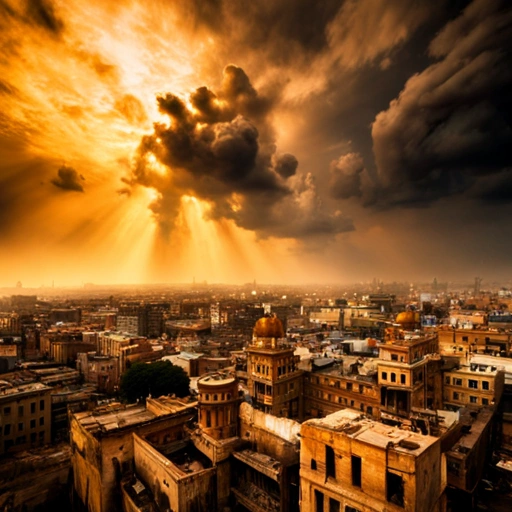

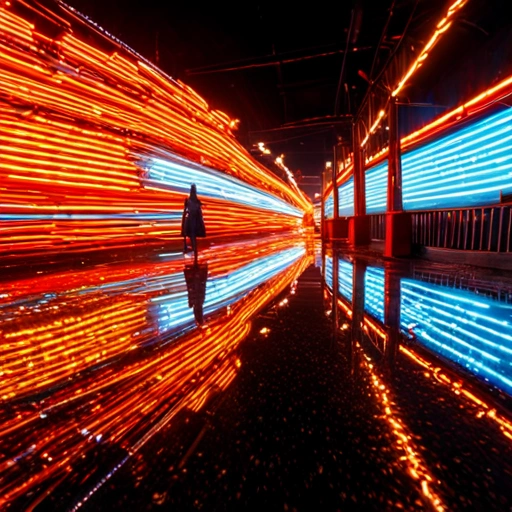

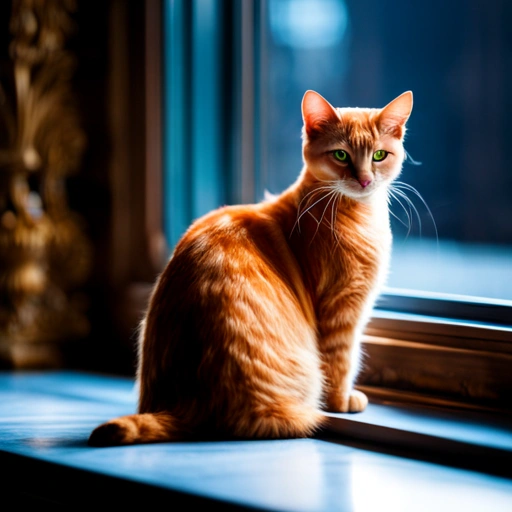

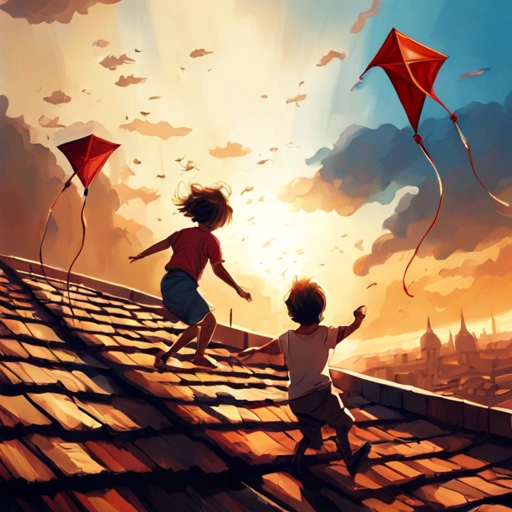

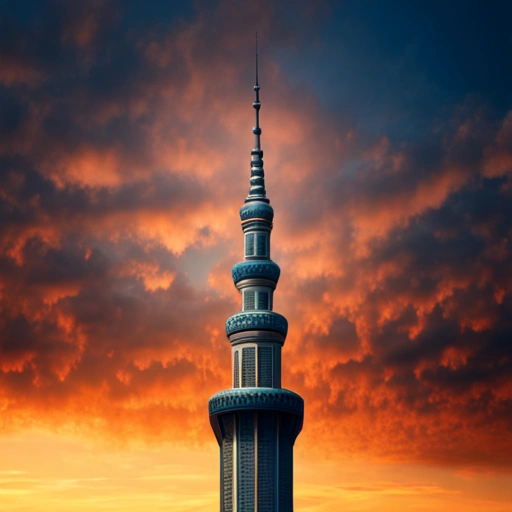

In [ ]:
# ============================
# 1) Install dependencies
# ============================
# In Colab, the "!" works. If running locally, run these in your shell once.

# ============================
# 2) Imports & API setup
# ============================
import os
import re
from datetime import datetime
from pathlib import Path
from typing import List

import google.generativeai as genai
from huggingface_hub import InferenceClient
from PIL import Image
from IPython.display import display

# -----> IMPORTANT: keep your keys in environment variables.
# Set these in Colab (first time only) or your OS env:
# os.environ["GEMINI_API_KEY"] = "YOUR_GEMINI_KEY"
# os.environ["HF_TOKEN"] = "YOUR_HF_TOKEN"

GEMINI_API_KEY = ""
HF_TOKEN = ""

if not GEMINI_API_KEY:
    raise RuntimeError("GEMINI_API_KEY env var not set. Set it before running.")
if not HF_TOKEN:
    raise RuntimeError("HF_TOKEN env var not set. Set it before running.")

genai.configure(api_key=GEMINI_API_KEY)
inference_client = InferenceClient(provider="auto", api_key=HF_TOKEN)

# ============================
# 3) Helper: make 5 sentences
# ============================
def scenario_to_five_sentences(scenario: str) -> List[str]:
    """
    Uses Gemini to convert a scenario into EXACTLY 5 short, visual, concrete sentences.
    Returns a list of 5 strings.
    """
    model = genai.GenerativeModel("gemini-2.5-flash")
    prompt = f"""
You are a creative writing assistant for image generation.
Given the scenario between triple backticks, output EXACTLY 5 separate sentences,
each on its own line, no numbering/bullets, no extra text.

Rules:
- 6–14 words each.
- Visual, concrete details (lighting, mood, actions, foreground/background).
- No pronouns like "it" without clear referents.
- No meta text, headers, or explanations—just five lines.

Scenario:
```{scenario}```
"""
    resp = model.generate_content(prompt)
    text = resp.text.strip()

    # Split into lines, remove empties, strip numbers/bullets if any slipped in.
    lines = [re.sub(r"^\s*[\d\-\)\.]+\s*", "", ln).strip() for ln in text.splitlines()]
    lines = [ln for ln in lines if ln]

    # If Gemini returned more than 5, take first 5; if fewer, raise error.
    if len(lines) < 5:
        raise ValueError(f"LLM returned fewer than 5 sentences:\n{text}")
    return lines[:5]

# ============================
# 4) Helper: generate image
# ============================
def generate_image_for_sentence(sentence: str, out_dir: Path, index: int) -> Path:
    """
    Uses SDXL via HuggingFace InferenceClient to make an image for one sentence.
    Saves to PNG and returns the path.
    """
    # Add gentle SDXL-friendly hints (non-stylized to keep prompt yours).
    prompt = (
        f"{sentence}. Highly detailed, sharp focus, cinematic, vibrant, realistic lighting."
    )
    # Model ID can be changed to other SDXL variants if you prefer
    model_id = "stabilityai/stable-diffusion-xl-base-1.0"

    img: Image.Image = inference_client.text_to_image(
        prompt,
        model=model_id,
    )

    out_path = out_dir / f"image_{index+1:02d}.png"
    img.save(out_path)
    return out_path

# ============================
# 5) Run: scenario -> sentences -> images
# ============================
# Example scenario (you can replace this string any time)
scenario = (
    "At sunrise in Lahore, monsoon clouds roll over lively streets as vendors set up; "
    "rickshaws weave through puddles reflecting neon shop signs; a stray cat watches from a windowsill; "
    "children chase a bright kite above old city rooftops near a historic mosque."
)

# Create an output folder
stamp = datetime.now().strftime("%Y%m%d_%H%M%S")
out_dir = Path(f"./scenario_images_{stamp}")
out_dir.mkdir(parents=True, exist_ok=True)

# 1) Scenario -> 5 sentences
sentences = scenario_to_five_sentences(scenario)
print("Generated sentences:\n")
for i, s in enumerate(sentences, 1):
    print(f"{i}. {s}")

# 2) Each sentence -> image
print("\nGenerating images with SDXL (this can take a little time)...")
image_paths = []
for idx, sentence in enumerate(sentences):
    p = generate_image_for_sentence(sentence, out_dir, idx)
    image_paths.append(p)

# 3) Show + list saved files
print("\nSaved image files:")
for p in image_paths:
    print(" -", p)

print("\nDisplaying images:")
for p in image_paths:
    display(Image.open(p))
